In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use("Solarize_Light2")

In [ ]:
def timber(in_arr, head, tail):
    if head == tail:
        return in_arr[head]
    return sum(in_arr[head:tail+1]) - min(timber(in_arr, head+1, tail), timber(in_arr, head, tail-1))

In [2]:
# under cooked
# def timber(in_arr, head, tail):
#     if head == tail:
#         return in_arr[head]
#     return max(in_arr[head] + min(timber(in_arr, head+2, tail), timber(in_arr, head+1, tail-1)), in_arr[tail] + min(timber(in_arr, head+1, tail-1), timber(in_arr, head, tail-2)))

In [11]:
def timber_BU(in_arr, head, tail):
    # init memory
    mem = [[in_arr[row] if row == col else 0 for row in range(tail+1)] for col in range(tail+1)]
    p = [['S' if row == col else ' ' for row in range(tail+1)] for col in range(tail+1)]
    # starting j
    start_j = 1
    while start_j < tail+1:
        # this work that i reset to 0 every time, go back to the top row
        # while j only restart where j where originally with one step a head
        j = start_j
        i = 0
        while i < tail+1 and j < tail+1:
            # relation
            if i != j and i < j:
                if mem[i+1][j] <= mem[i][j-1]:
                    mem[i][j] = sum(in_arr[i:j+1]) - mem[i+1][j]
                    p[i][j] = 'L'
                elif mem[i][j-1] < mem[i+1][j]:
                    mem[i][j] = sum(in_arr[i:j+1]) - mem[i][j-1]
                    p[i][j] = 'R'
            # move both j and i
            j += 1
            i += 1
        # move the next diagonal rows on the next columns
        start_j += 1
        # return result from desired input
    # return mem[head][tail]
    return mem, p

In [12]:
timber_BU([9, 6, 5, 7], 0, 3)

([[9, 9, 14, 15], [0, 6, 6, 12], [0, 0, 5, 7], [0, 0, 0, 7]],
 [['S', 'L', 'L', 'L'],
  [' ', 'S', 'L', 'R'],
  [' ', ' ', 'S', 'R'],
  [' ', ' ', ' ', 'S']])

In [ ]:
def perform_test(n_max, n_step):
    iter_arr = []
    time_arr = []
    for i in range(n_step, n_max+1, n_step):
        # random timber generators
        curr_arr = np.random.randint(1, 1001, size=i)
        # timer
        start_time = time.time()
        timber(curr_arr, 0, i-1)
        end_time = time.time()
        time_diff = end_time - start_time
        # record
        time_arr.append(time_diff)
        iter_arr.append(i)

        # print(f"done iter: {i}")

    return time_arr, iter_arr

In [ ]:
# Generate x values
x_values = range(0, 21, 1)  # Adjust the range as needed

# Calculate y values
y_values = [2**x for x in x_values]

# Plot the function
plt.plot(x_values, y_values)

# Add labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title(r'Plot of $y = 2^x$')

# Show the plot
plt.show()

In [ ]:
time_arr, iter_arr = perform_test(21, 1)

In [ ]:
# plot
plt.plot(iter_arr, time_arr)
plt.plot(iter_arr[18:], time_arr[18:], 'ro')
plt.xticks(iter_arr)
plt.xlabel("timber length")
plt.ylabel("time (seconds)")
plt.title("Timber() performance based on timber length")

# Annotate the point of interest
plt.text(iter_arr[20], time_arr[20], f'({iter_arr[20]}, {time_arr[20]})', 
         horizontalalignment='left', verticalalignment='bottom')
plt.text(iter_arr[19], time_arr[19], f'({iter_arr[19]}, {time_arr[19]})', 
         horizontalalignment='left', verticalalignment='bottom')
plt.text(iter_arr[18], time_arr[18], f'({iter_arr[18]}, {time_arr[18]})', 
         horizontalalignment='left', verticalalignment='bottom')
plt.show()

In [3]:
def perform_test_BU(n_max, n_step):
    iter_arr = []
    time_arr = []
    for i in range(n_step, n_max+1, n_step):
        # random timber generators
        curr_arr = np.random.randint(1, 1001, size=i)
        # timer
        start_time = time.time()
        timber_BU(curr_arr, 0, i-1)
        end_time = time.time()
        time_diff = end_time - start_time
        # record
        time_arr.append(time_diff)
        iter_arr.append(i)

        print(f"done iter: {i}")

    return time_arr, iter_arr

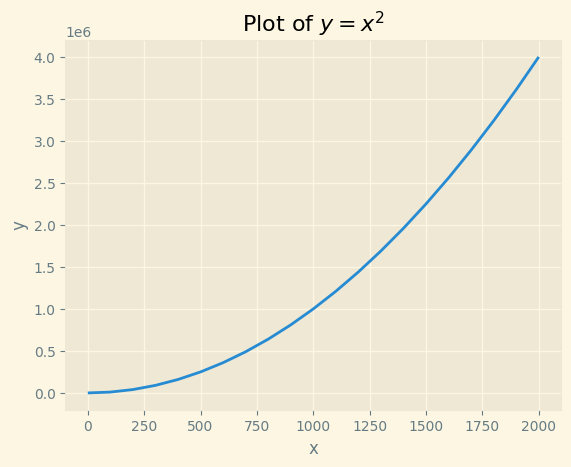

In [4]:
# Generate x values
x_values = range(0, 2001, 100)  # Adjust the range as needed

# Calculate y values
y_values = [x**2 for x in x_values]

# Plot the function
plt.plot(x_values, y_values)

# Add labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title(r'Plot of $y = x^2$')

# Show the plot
plt.show()

In [5]:
time_arr, iter_arr = perform_test_BU(2000, 100)

done iter: 100
done iter: 200
done iter: 300
done iter: 400
done iter: 500
done iter: 600
done iter: 700
done iter: 800
done iter: 900
done iter: 1000
done iter: 1100
done iter: 1200
done iter: 1300
done iter: 1400
done iter: 1500
done iter: 1600
done iter: 1700
done iter: 1800
done iter: 1900
done iter: 2000


In [8]:
curr_arr = np.random.randint(1, 1001, size=2000)
# timer
start_time = time.time()
timber_BU(curr_arr, 0, 2000-1)
end_time = time.time()
time_diff = end_time - start_time
print(time_diff)

57.87606239318848


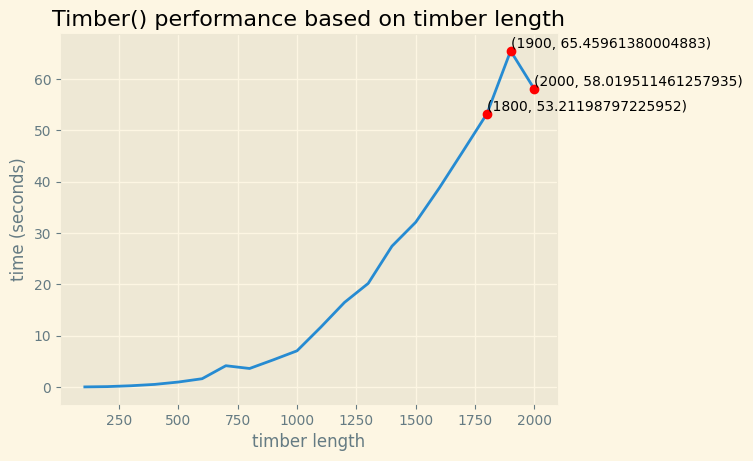

In [9]:
# plot
plt.plot(iter_arr, time_arr)
plt.plot(iter_arr[17:], time_arr[17:], 'ro')
# plt.xticks(iter_arr)
plt.xlabel("timber length")
plt.ylabel("time (seconds)")
plt.title("Timber() performance based on timber length")

# Annotate the point of interest
plt.text(iter_arr[19], time_arr[19], f'({iter_arr[19]}, {time_arr[19]})', 
         horizontalalignment='left', verticalalignment='bottom')
plt.text(iter_arr[18], time_arr[18], f'({iter_arr[18]}, {time_arr[18]})', 
         horizontalalignment='left', verticalalignment='bottom')
plt.text(iter_arr[17], time_arr[17], f'({iter_arr[17]}, {time_arr[17]})', 
         horizontalalignment='left', verticalalignment='bottom')
plt.show()

In [10]:
time_arr[18]

65.45961380004883

In [12]:
time_arr[17]

53.21198797225952